In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
data=pd.read_csv('Skyserver.csv')
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [4]:
cols=data.columns
for c in cols:
    print(c, len(data[c].unique()))

objid 1
ra 10000
dec 10000
u 9730
g 9817
r 9852
i 9890
z 9896
run 23
rerun 1
camcol 6
field 703
specobjid 6349
class 3
redshift 9637
plate 487
mjd 355
fiberid 892


In [5]:
data['objid'].head(10)

0    1.237650e+18
1    1.237650e+18
2    1.237650e+18
3    1.237650e+18
4    1.237650e+18
5    1.237650e+18
6    1.237650e+18
7    1.237650e+18
8    1.237650e+18
9    1.237650e+18
Name: objid, dtype: float64

In [6]:
data['rerun'].head(10)

0    301
1    301
2    301
3    301
4    301
5    301
6    301
7    301
8    301
9    301
Name: rerun, dtype: int64

In [7]:
data.drop(['objid','rerun'],axis=1,inplace=True)

In [8]:
data

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [9]:
data.describe(include='all')

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998,NaN,NaN,NaN,NaN
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,NaN,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,NaN,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,NaN,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,NaN,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,NaN,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,NaN,0.092579,2559.000000,54468.000000,510.000000


In [10]:
type(data['specobjid'][0])

numpy.float64

In [11]:
data['specobjid']=data['specobjid']/(10**17)
data['specobjid']

0       37.22360
1        3.63814
2        3.23274
3       37.22370
4       37.22370
          ...   
9995     5.03345
9996     5.03340
9997    82.22620
9998     5.03340
9999     5.03341
Name: specobjid, Length: 10000, dtype: float64

In [12]:
data.describe(include='all')

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4998,NaN,NaN,NaN,NaN
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,16.450216,NaN,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,20.139985,NaN,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780,NaN,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389247,NaN,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580,NaN,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,28.813000,NaN,0.092579,2559.000000,54468.000000,510.000000


In [13]:
cols=data.columns
for c in cols:
    print(c, len(data[c].unique()))

ra 10000
dec 10000
u 9730
g 9817
r 9852
i 9890
z 9896
run 23
camcol 6
field 703
specobjid 6349
class 3
redshift 9637
plate 487
mjd 355
fiberid 892


In [14]:
sns.set()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['class']=le.fit_transform(data['class'])

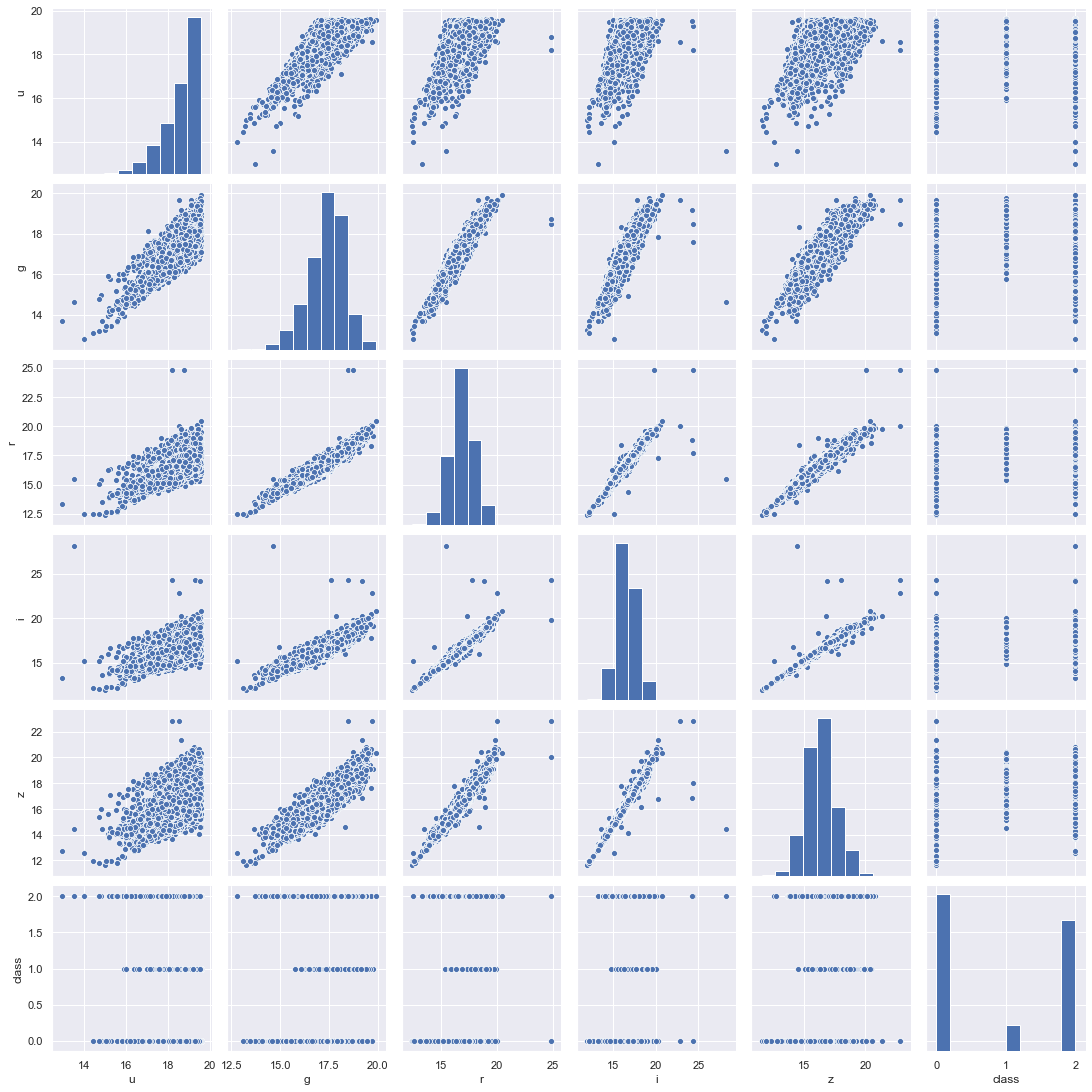

In [16]:
sns.pairplot(data[['u','g','r','i','z','class']])
plt.show()

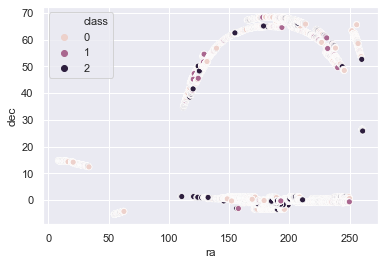

In [17]:
sns.scatterplot(data['ra'],data['dec'],hue=data['class'])
plt.show()

#### Angular position from earth has nothing to do with the stars classification.

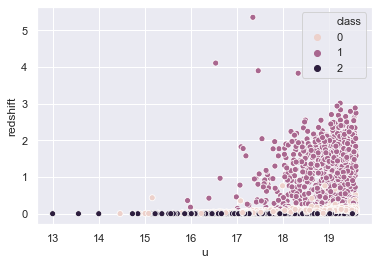

In [18]:
sns.scatterplot(data['u'],data['redshift'],hue=data['class'])
plt.show()

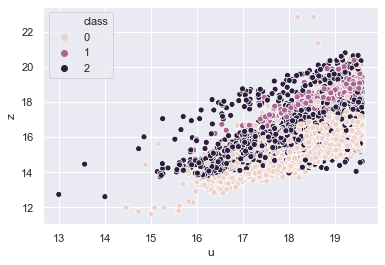

In [19]:
sns.scatterplot(data['u'],data['z'],hue=data['class'])
plt.show()

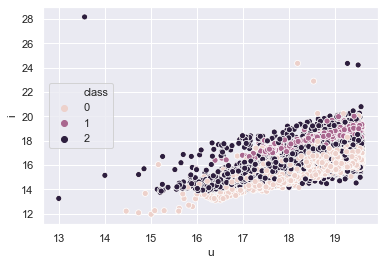

In [20]:
sns.scatterplot(data['u'],data['i'],hue=data['class'])
plt.show()

In [21]:
data['uz']=data['u']*data['z']

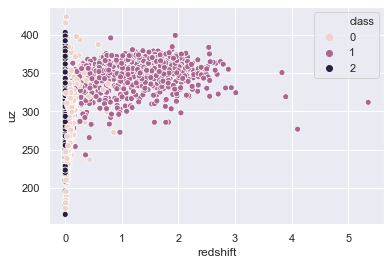

In [22]:
sns.scatterplot(data['redshift'],data['uz'],hue=data['class'])
plt.show()

In [24]:
data['u/z']=data['u']/data['z']

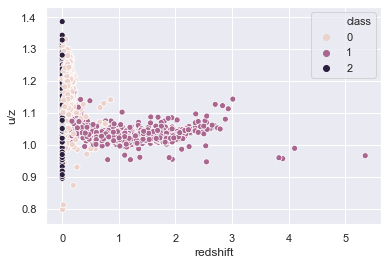

In [25]:
sns.scatterplot(data['redshift'],data['u/z'],hue=data['class'])
plt.show()

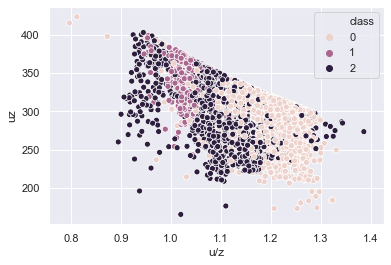

In [26]:
sns.scatterplot(data['u/z'],data['uz'],hue=data['class'])
plt.show()

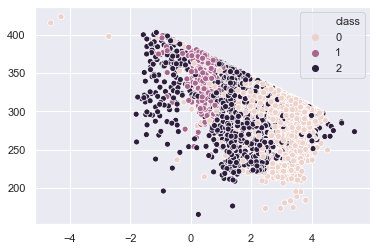

In [27]:
a=data['u']-data['z']
b=data['u']*data['z']
sns.scatterplot(a,b,hue=data['class'])
plt.show()

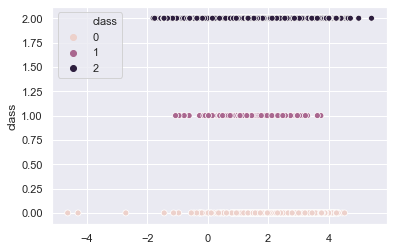

In [28]:
sns.scatterplot(a,data['class'],hue=data['class'])
plt.show()

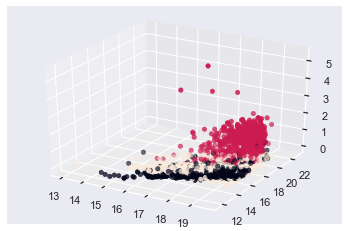

In [31]:
ax = plt.axes(projection='3d')
ax.scatter(data['u'],data['z'], data['redshift'], c=data['class'],  linewidth=0.5);
plt.show()

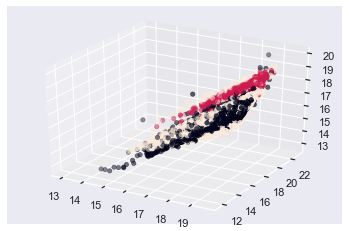

In [32]:
ax = plt.axes(projection='3d')
ax.scatter(data['u'],data['z'], data['g'], c=data['class'], linewidth=0.5);
plt.show()

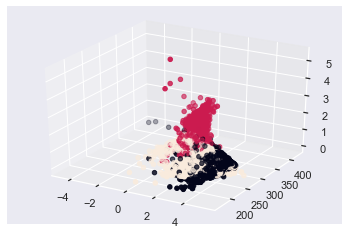

In [33]:
fig=plt.figure()
alpha=fig.add_subplot(111, projection = '3d')
alpha.scatter(a,b,data['redshift'],c=data['class'])
plt.show()

In [34]:
useful=data[['u','g','r','i','z','redshift','class']]

In [35]:
useful

,u,g,r,i,z,redshift,class
0,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009,2
1,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055,2
2,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111,0
3,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111,2
4,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590,2
...,...,...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570,0.027583,0
9996,18.27255,17.43849,17.07692,16.71661,16.69897,0.117772,0
9997,18.75818,17.77784,17.51872,17.43302,17.42048,-0.000402,2
9998,18.88287,17.91068,17.53152,17.36284,17.13988,0.014019,0


In [36]:
y=useful['class']
x=useful.drop(['class'],axis=1)

In [37]:
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [38]:
x.head()

,u,g,r,i,z,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590


In [39]:
x.skew()

u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
redshift    4.265729
dtype: float64

#### It is better not to treat this skewness as the radiating radiating very highly on ultraviolet band has a different mechanism of irridiance: a very useful information to it's classification. Also not all celestial objects are moving relative to earth and hence relative to each other(expanding bubble like universe model)with very high velocity, so we are keeping redshift untreated for skewness.

In [40]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(x)

array([[ 1.03148637, -0.34855938, -0.83728027, -0.94605772, -0.99534154,
        -0.36973112],
       [ 0.05243046, -0.16653251, -0.15415531, -0.08264457, -0.02604308,
        -0.36984929],
       [ 0.92156796,  0.86709322,  0.59315368,  0.44120145,  0.31452753,
        -0.05302706],
       ...,
       [ 0.16753826,  0.42934659,  0.63477543,  0.74398287,  0.82921097,
        -0.37074104],
       [ 0.31801835,  0.56985707,  0.64676369,  0.6825157 ,  0.59598555,
        -0.33364691],
       [ 0.79229193,  0.00672567, -0.5015808 , -0.65522289, -0.76214106,
        -0.06510125]])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
print(confusion_matrix(lr.predict(X_test),y_test))
print(classification_report(lr.predict(X_test),y_test))

0.9575
[[928  12  13]
 [  4 164   1]
 [ 55   0 823]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       953
           1       0.93      0.97      0.95       169
           2       0.98      0.94      0.96       878

    accuracy                           0.96      2000
   macro avg       0.95      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x, y, cv=5)
scores

array([0.9575, 0.9615, 0.962 , 0.9535, 0.9575])

In [45]:
scores.mean()

0.9583999999999999

In [46]:
data.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,uz,u/z
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,16.450216,0.915400,0.143726,1460.986400,52943.533300,353.069400,306.332356,1.137683
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,20.139985,0.952856,0.388774,1788.778371,1511.150651,206.298149,31.506514,0.068142
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780,0.000000,-0.004136,266.000000,51578.000000,1.000000,165.426223,0.796948
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389247,0.000000,0.000081,301.000000,51900.000000,186.750000,287.294239,1.090406
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580,1.000000,0.042591,441.000000,51997.000000,351.000000,308.636727,1.137168
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,28.813000,2.000000,0.092579,2559.000000,54468.000000,510.000000,327.099275,1.183902
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,94.688300,2.000000,5.353854,8410.000000,57481.000000,1000.000000,423.339089,1.386132


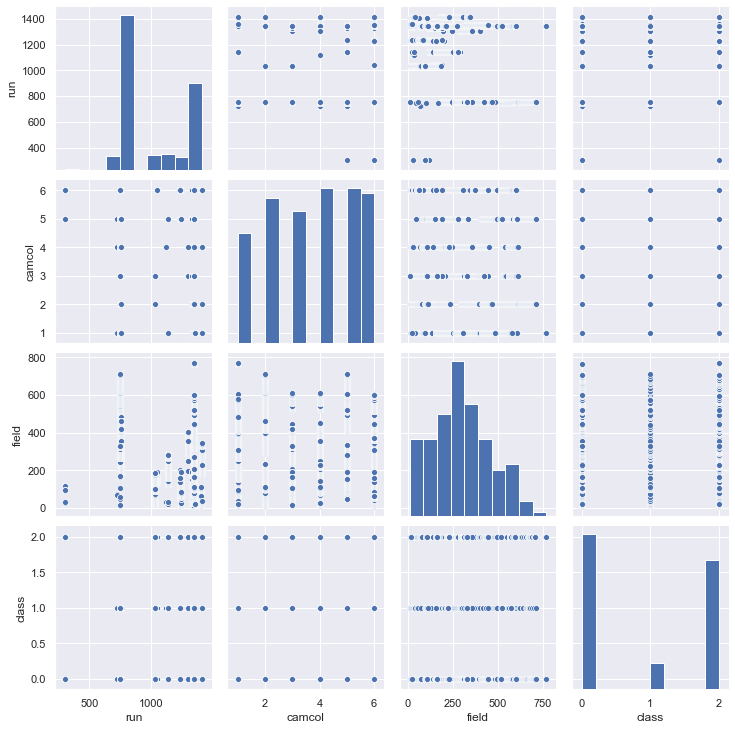

In [47]:
sns.pairplot(data[['run','camcol','field','class']])
plt.show()

In [48]:
data[['run','camcol','field','class']].corr()

,run,camcol,field,class
run,1.000000,0.151814,-0.463898,-0.078162
camcol,0.151814,1.000000,-0.067921,-0.006186
field,-0.463898,-0.067921,1.000000,0.007713
class,-0.078162,-0.006186,0.007713,1.000000


#### As run,camcol and field are related to the mechanism of discovery and not to the nature of the object itself they have almost zero correlation with the target variable.

In [49]:
independent=data[['u','g','r','i','z','uz','u/z']]

In [50]:
dependent=data['class']

In [51]:
independent=ss.fit_transform(independent)

In [52]:
independent

array([[ 1.03148637, -0.34855938, -0.83728027, ..., -0.99534154,
        -0.31213378,  2.07481773],
       [ 0.05243046, -0.16653251, -0.15415531, ..., -0.02604308,
        -0.0133652 ,  0.01295585],
       [ 0.92156796,  0.86709322,  0.59315368, ...,  0.31452753,
         0.61342563,  0.23452225],
       ...,
       [ 0.16753826,  0.42934659,  0.63477543, ...,  0.82921097,
         0.64891869, -0.89367678],
       [ 0.31801835,  0.56985707,  0.64676369, ...,  0.59598555,
         0.54968429, -0.52819961],
       [ 0.79229193,  0.00672567, -0.5015808 , ..., -0.76214106,
        -0.23625451,  1.54756872]])

In [53]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [54]:
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
print(confusion_matrix(lr.predict(X_test),y_test))
print(classification_report(lr.predict(X_test),y_test))

0.957
[[961  13   9]
 [  7 155   0]
 [ 57   0 798]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       983
           1       0.92      0.96      0.94       162
           2       0.99      0.93      0.96       855

    accuracy                           0.96      2000
   macro avg       0.95      0.96      0.95      2000
weighted avg       0.96      0.96      0.96      2000



In [55]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=(36,6),max_iter=1000)


In [56]:
models=[lr,tree,nb,knc,nn]
for model in models:
    model.fit(X_train,y_train)
    print('---'*30,'\n',model,'\n','---'*30)
    print(model.score(X_test,y_test))
    print(confusion_matrix(model.predict(X_test),y_test))
    print(classification_report(model.predict(X_test),y_test))

------------------------------------------------------------------------------------------ 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 ------------------------------------------------------------------------------------------
0.957
[[961  13   9]
 [  7 155   0]
 [ 57   0 798]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       983
           1       0.92      0.96      0.94       162
           2       0.99      0.93      0.96       855

    accuracy                           0.96      2000
   macro avg       0.95      0.96      0.95      2000
weighted avg       0.96      0.96      0.96      2000

------------------------------------------------------

In [57]:
print(cross_val_score(tree,x,y,cv=5))
print(cross_val_score(nn,x,y,cv=5))

[0.9875 0.987  0.988  0.984  0.9875]
[0.9835 0.985  0.985  0.975  0.979 ]


#### Clearly Decission tree has slight but percistant advantage

In [58]:
from sklearn.externals import joblib
joblib.dump(tree,'space.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['space.pkl']

In [60]:
result=tree.predict(X_test)

In [61]:
output=pd.DataFrame(result)
output.to_csv('output.csv')